# Experimento 7: classificação com SVM otimizado

- Classificador SVM usando atributos FS20, 30 realizações.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (classification_report,
                             plot_confusion_matrix,
                             confusion_matrix,
                             accuracy_score)

In [2]:
def acuracia_por_frequencia(
        frequence:np.ndarray,
        y_true:np.ndarray,
        y_pred:np.ndarray,
        rodada : int = 0
    )->pd.DataFrame:
    
    df = pd.DataFrame(
        data=[frequence, y_true, y_pred],
        index=['freq', 'true', 'pred']
        ).transpose()

    score_dict = {}

    for freq, sub_df in df.groupby('freq'):
        score_dict[f'freq_{freq}_support'] = len(sub_df)
        score_dict[f'freq_{freq}_acc'] = accuracy_score(y_true=sub_df['true'].values,
                                                        y_pred=sub_df['pred'].values)
    return pd.DataFrame(score_dict, index=[rodada])


## Carregando dados e classificação

seeds: [3037 5074 4229 4386 4390 7107 6528 1226 2510 4368 4557 7702 1585 7319
 3251 5501 3283 1924 3452 1302 1457 2599 2121 1435 5576 3218  525 3009
 3281 7434]
Rodada: 0 - seed: 3037

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        74
        HI-1       0.99      0.96      0.98        82
        HI-2       0.99      0.99      0.99        74
        HI-3       1.00      0.99      0.99        80
        LI-1       0.93      0.98      0.96        65
        LI-2       1.00      0.99      0.99        77
        LI-3       1.00      1.00      1.00        67

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



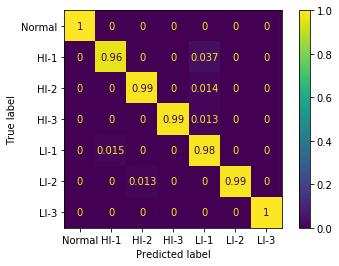

Rodada: 1 - seed: 5074

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        68
        HI-1       0.94      0.95      0.95        87
        HI-2       1.00      1.00      1.00        77
        HI-3       1.00      0.99      0.99        75
        LI-1       0.93      0.93      0.93        69
        LI-2       1.00      1.00      1.00        84
        LI-3       1.00      1.00      1.00        59

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



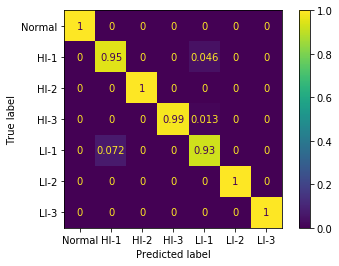

Rodada: 2 - seed: 4229

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        70
        HI-1       0.93      0.99      0.96        70
        HI-2       1.00      0.97      0.99        74
        HI-3       1.00      1.00      1.00        69
        LI-1       0.97      0.95      0.96        80
        LI-2       1.00      1.00      1.00        76
        LI-3       1.00      1.00      1.00        80

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



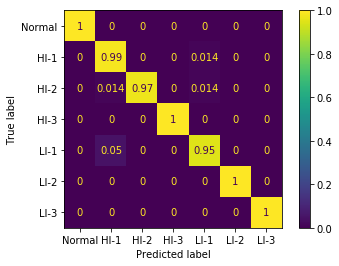

Rodada: 3 - seed: 4386

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        68
        HI-1       0.97      0.95      0.96        88
        HI-2       0.99      0.99      0.99        68
        HI-3       1.00      0.99      0.99        81
        LI-1       0.94      0.97      0.96        70
        LI-2       1.00      1.00      1.00        89
        LI-3       1.00      1.00      1.00        55

    accuracy                           0.98       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.98      0.98      0.98       519



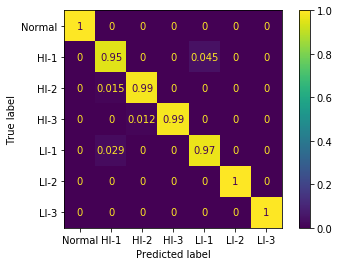

Rodada: 4 - seed: 4390

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        68
        HI-1       1.00      0.96      0.98        89
        HI-2       0.99      1.00      0.99        69
        HI-3       1.00      0.99      0.99        73
        LI-1       0.95      1.00      0.98        79
        LI-2       1.00      1.00      1.00        73
        LI-3       1.00      1.00      1.00        68

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



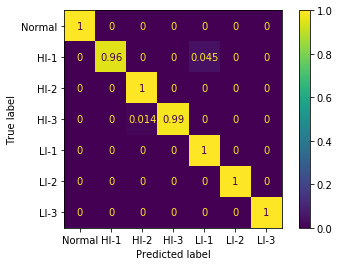

Rodada: 5 - seed: 7107

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        72
        HI-1       0.94      0.96      0.95        83
        HI-2       1.00      1.00      1.00        67
        HI-3       1.00      1.00      1.00        72
        LI-1       0.96      0.94      0.95        79
        LI-2       1.00      1.00      1.00        74
        LI-3       1.00      1.00      1.00        72

    accuracy                           0.98       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.98      0.98      0.98       519



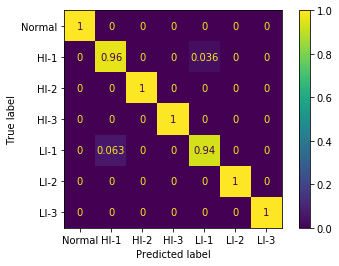

Rodada: 6 - seed: 6528

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        71
        HI-1       0.97      0.95      0.96        76
        HI-2       1.00      0.99      0.99        81
        HI-3       1.00      1.00      1.00        75
        LI-1       0.93      0.97      0.95        70
        LI-2       1.00      1.00      1.00        69
        LI-3       1.00      1.00      1.00        77

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



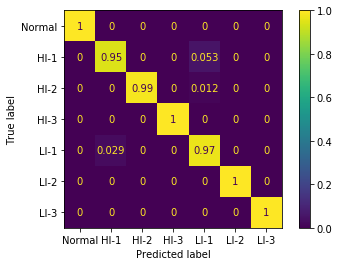

Rodada: 7 - seed: 1226

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        73
        HI-1       0.98      0.90      0.94        62
        HI-2       1.00      0.95      0.97        91
        HI-3       1.00      1.00      1.00        73
        LI-1       0.91      1.00      0.95        82
        LI-2       0.97      1.00      0.98        65
        LI-3       1.00      1.00      1.00        73

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



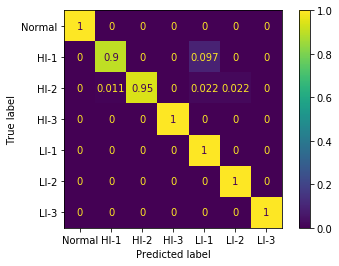

Rodada: 8 - seed: 2510

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        70
        HI-1       0.95      0.99      0.97        79
        HI-2       1.00      0.99      0.99        71
        HI-3       1.00      1.00      1.00        84
        LI-1       0.99      0.96      0.98        85
        LI-2       1.00      1.00      1.00        70
        LI-3       1.00      1.00      1.00        60

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



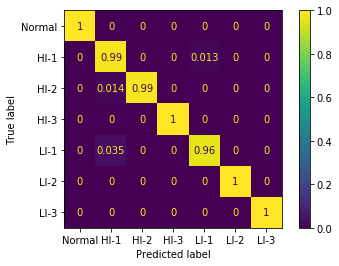

Rodada: 9 - seed: 4368

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        71
        HI-1       0.93      0.99      0.96        71
        HI-2       0.99      0.99      0.99        84
        HI-3       1.00      0.99      0.99        75
        LI-1       0.98      0.94      0.96        68
        LI-2       1.00      1.00      1.00        71
        LI-3       1.00      1.00      1.00        79

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



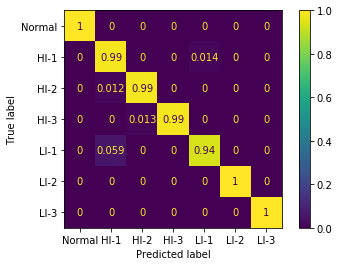

Rodada: 10 - seed: 4557

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        69
        HI-1       0.99      0.96      0.97        78
        HI-2       1.00      1.00      1.00        83
        HI-3       1.00      1.00      1.00        66
        LI-1       0.96      0.99      0.97        70
        LI-2       1.00      1.00      1.00        74
        LI-3       1.00      1.00      1.00        79

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



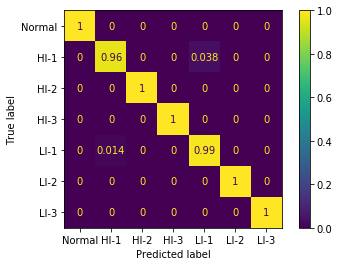

Rodada: 11 - seed: 7702

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        69
        HI-1       0.97      0.92      0.94        71
        HI-2       0.98      1.00      0.99        81
        HI-3       1.00      0.96      0.98        76
        LI-1       0.91      0.97      0.94        75
        LI-2       1.00      1.00      1.00        73
        LI-3       1.00      1.00      1.00        74

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



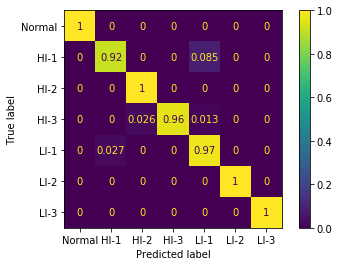

Rodada: 12 - seed: 1585

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        68
        HI-1       0.97      0.95      0.96        76
        HI-2       0.99      1.00      0.99        81
        HI-3       1.00      1.00      1.00        73
        LI-1       0.96      0.98      0.97        83
        LI-2       1.00      1.00      1.00        65
        LI-3       1.00      1.00      1.00        73

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



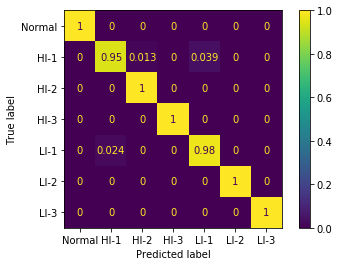

Rodada: 13 - seed: 7319

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        65
        HI-1       0.94      0.98      0.96        87
        HI-2       0.99      0.99      0.99        68
        HI-3       1.00      1.00      1.00        80
        LI-1       0.97      0.93      0.95        71
        LI-2       1.00      1.00      1.00        76
        LI-3       1.00      1.00      1.00        72

    accuracy                           0.98       519
   macro avg       0.99      0.98      0.99       519
weighted avg       0.98      0.98      0.98       519



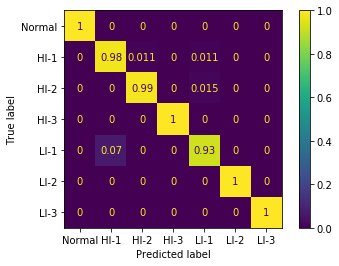

Rodada: 14 - seed: 3251

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        68
        HI-1       1.00      0.96      0.98        73
        HI-2       0.98      1.00      0.99        65
        HI-3       1.00      1.00      1.00        90
        LI-1       0.97      1.00      0.99        71
        LI-2       1.00      1.00      1.00        72
        LI-3       1.00      1.00      1.00        80

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



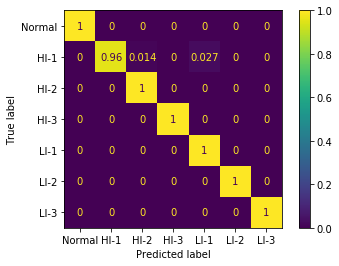

Rodada: 15 - seed: 5501

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99        69
        HI-1       0.95      0.97      0.96        74
        HI-2       0.97      0.99      0.98        73
        HI-3       1.00      1.00      1.00        80
        LI-1       0.98      0.95      0.96        84
        LI-2       1.00      0.97      0.99        71
        LI-3       1.00      1.00      1.00        68

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



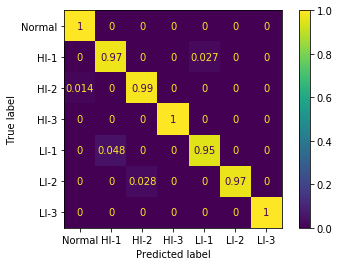

Rodada: 16 - seed: 3283

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        74
        HI-1       0.97      0.94      0.96        80
        HI-2       0.99      1.00      0.99        83
        HI-3       1.00      1.00      1.00        63
        LI-1       0.94      0.97      0.95        63
        LI-2       1.00      1.00      1.00        79
        LI-3       1.00      1.00      1.00        77

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



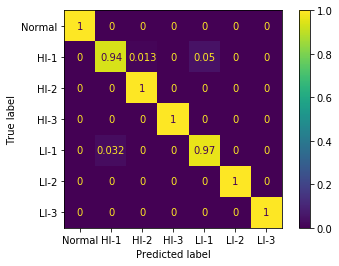

Rodada: 17 - seed: 1924

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        75
        HI-1       0.98      0.93      0.96        70
        HI-2       0.96      0.99      0.98        83
        HI-3       1.00      1.00      1.00        78
        LI-1       0.93      0.99      0.96        72
        LI-2       1.00      0.97      0.99        73
        LI-3       1.00      1.00      1.00        68

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



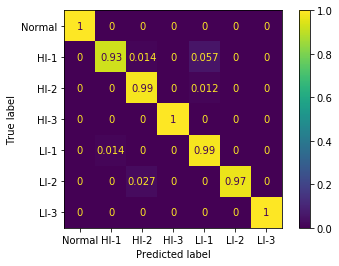

Rodada: 18 - seed: 3452

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        70
        HI-1       0.99      0.99      0.99        77
        HI-2       1.00      0.99      0.99        77
        HI-3       1.00      1.00      1.00        83
        LI-1       0.97      0.99      0.98        68
        LI-2       1.00      1.00      1.00        60
        LI-3       1.00      1.00      1.00        84

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



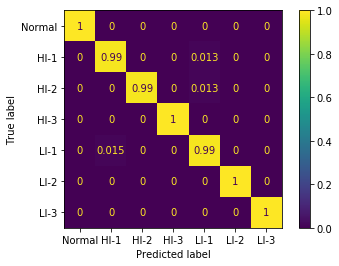

Rodada: 19 - seed: 1302

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        61
        HI-1       0.95      0.96      0.96        78
        HI-2       1.00      1.00      1.00        70
        HI-3       1.00      1.00      1.00        92
        LI-1       0.96      0.95      0.95        74
        LI-2       1.00      1.00      1.00        69
        LI-3       1.00      1.00      1.00        75

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



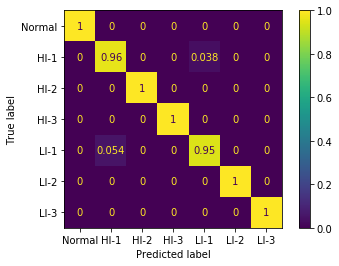

Rodada: 20 - seed: 1457

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        64
        HI-1       0.97      0.99      0.98        89
        HI-2       1.00      1.00      1.00        74
        HI-3       1.00      1.00      1.00        77
        LI-1       0.98      0.96      0.97        68
        LI-2       1.00      1.00      1.00        73
        LI-3       1.00      1.00      1.00        74

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



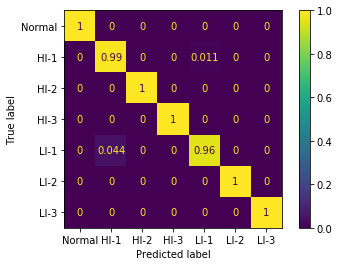

Rodada: 21 - seed: 2599

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        75
        HI-1       0.96      0.97      0.97        72
        HI-2       0.99      1.00      0.99        78
        HI-3       1.00      0.98      0.99        61
        LI-1       0.97      0.96      0.97        76
        LI-2       1.00      1.00      1.00        81
        LI-3       1.00      1.00      1.00        76

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



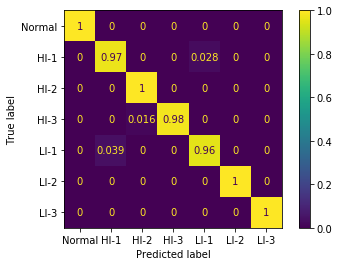

Rodada: 22 - seed: 2121

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        81
        HI-1       0.96      0.97      0.97        74
        HI-2       1.00      0.96      0.98        82
        HI-3       0.96      1.00      0.98        71
        LI-1       0.97      0.96      0.97        77
        LI-2       1.00      1.00      1.00        69
        LI-3       1.00      1.00      1.00        65

    accuracy                           0.98       519
   macro avg       0.98      0.99      0.98       519
weighted avg       0.98      0.98      0.98       519



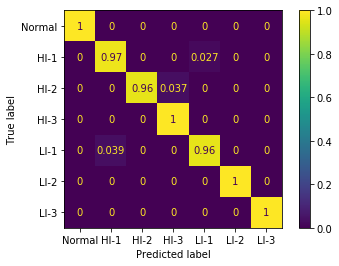

Rodada: 23 - seed: 1435

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        56
        HI-1       0.97      0.97      0.97        78
        HI-2       0.99      0.95      0.97        84
        HI-3       0.97      0.98      0.97        97
        LI-1       0.95      0.98      0.97        63
        LI-2       1.00      1.00      1.00        65
        LI-3       1.00      1.00      1.00        76

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



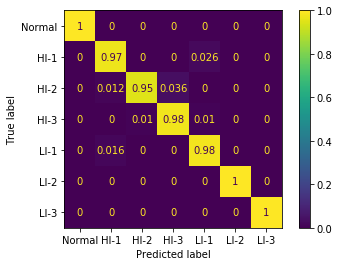

Rodada: 24 - seed: 5576

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        68
        HI-1       0.95      0.93      0.94        85
        HI-2       1.00      0.98      0.99        81
        HI-3       1.00      1.00      1.00        75
        LI-1       0.89      0.94      0.91        67
        LI-2       1.00      1.00      1.00        64
        LI-3       1.00      1.00      1.00        79

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



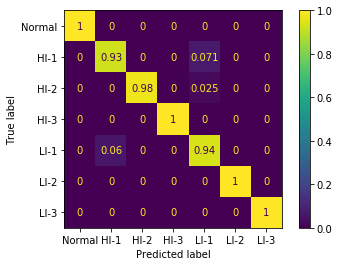

Rodada: 25 - seed: 3218

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        60
        HI-1       0.98      0.98      0.98        87
        HI-2       1.00      1.00      1.00        67
        HI-3       1.00      1.00      1.00        88
        LI-1       0.97      0.97      0.97        80
        LI-2       1.00      1.00      1.00        61
        LI-3       1.00      1.00      1.00        76

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



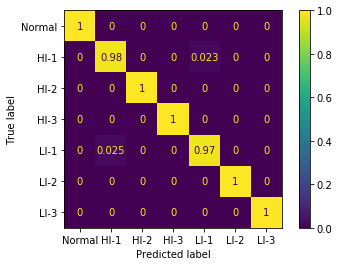

Rodada: 26 - seed: 525

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99        73
        HI-1       0.98      0.93      0.95        87
        HI-2       0.98      0.98      0.98        82
        HI-3       1.00      0.97      0.99        74
        LI-1       0.92      0.99      0.95        81
        LI-2       1.00      0.98      0.99        58
        LI-3       1.00      1.00      1.00        64

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



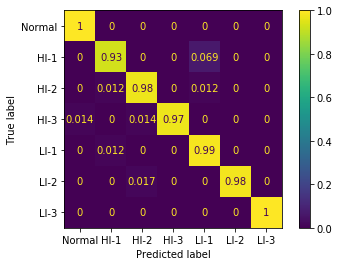

Rodada: 27 - seed: 3009

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        84
        HI-1       0.99      0.91      0.94        85
        HI-2       1.00      1.00      1.00        72
        HI-3       1.00      1.00      1.00        75
        LI-1       0.89      0.99      0.94        68
        LI-2       1.00      1.00      1.00        69
        LI-3       1.00      1.00      1.00        66

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



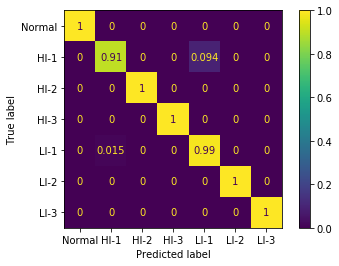

Rodada: 28 - seed: 3281

              precision    recall  f1-score   support

      Normal       0.97      1.00      0.98        64
        HI-1       0.95      0.95      0.95        65
        HI-2       0.99      0.99      0.99        75
        HI-3       1.00      0.98      0.99        84
        LI-1       0.96      0.97      0.96        70
        LI-2       1.00      0.99      0.99        86
        LI-3       1.00      1.00      1.00        75

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



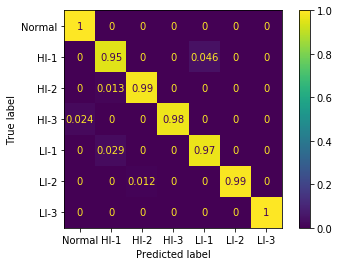

Rodada: 29 - seed: 7434

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        79
        HI-1       0.95      0.98      0.97        85
        HI-2       1.00      0.97      0.99        70
        HI-3       1.00      1.00      1.00        70
        LI-1       0.94      0.94      0.94        71
        LI-2       1.00      1.00      1.00        75
        LI-3       1.00      1.00      1.00        69

    accuracy                           0.98       519
   macro avg       0.99      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



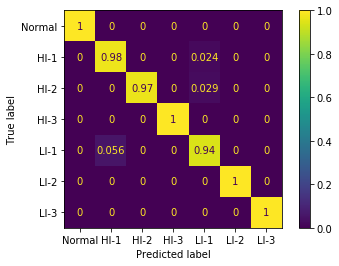

In [3]:
TARGET_LABELS = ['Normal', 'HI-1', 'HI-2', 'HI-3', 'LI-1', 'LI-2', 'LI-3']

fs20_df = pd.read_csv('./csvs/fs20.csv')

y = fs20_df.pop('target').values
X = fs20_df.values

random_seeds = np.random.randint(0, 8000, 30)
print(f'seeds: {random_seeds}')

acc_por_rodada = []
freq_scores_df = []
confu_matrices = []

for rodada, seed in enumerate(random_seeds):
    # Distribuindo os dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    # Instanciando e treinando classificador
    classifier = make_pipeline(
        StandardScaler(),
        SVC(C=10_000, gamma=0.5, cache_size=500)
        ).fit(
            X_train,
            y_train)

    # Realizando predição
    y_pred = classifier.predict(X_test)

    # Retorna a ultima coluna da matriz, que contém as frequências
    freq_test = X_test[:,-1]
    
    # Adicionando resultados à respectiva lista
    acc_por_rodada.append(
        accuracy_score(
            y_true=y_test,
            y_pred=y_pred))

    freq_scores_df.append(
        acuracia_por_frequencia(
            frequence=freq_test,
            y_true=y_test,
            y_pred=y_pred,
            rodada=rodada))

    confu_matrices.append(
        confusion_matrix(
            y_pred=y_pred,
            y_true=y_test,
            normalize='true'))

    # Exibindo resultados
    print(f'Rodada: {rodada} - seed: {seed}\n')

    print(classification_report(y_test, y_pred, target_names=TARGET_LABELS))
    
    plot_confusion_matrix(
        estimator=classifier,
        X=X_test,
        y_true=y_test,
        normalize='true',
        display_labels=TARGET_LABELS)
    
    plt.show()

## Matriz de confusão média

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.57678227e-01 2.17121640e-03 0.00000000e+00
  4.01505568e-02 0.00000000e+00 0.00000000e+00]
 [4.56621005e-04 3.42102977e-03 9.87428103e-01 2.40998839e-03
  5.55165749e-03 7.32600733e-04 0.00000000e+00]
 [1.24410124e-03 0.00000000e+00 3.53032221e-03 9.93582226e-01
  1.64335021e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.28324377e-02 0.00000000e+00 0.00000000e+00
  9.67167562e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.24741912e-03 0.00000000e+00
  0.00000000e+00 9.96752581e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]]


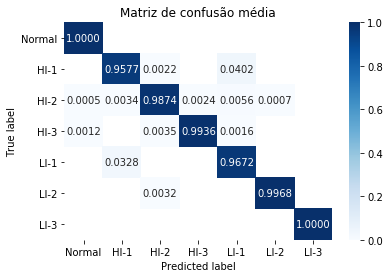

[[0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.02373387 0.00487103 0.         0.02343882 0.
  0.        ]
 [0.00245898 0.00570629 0.01463066 0.00901805 0.00852613 0.00394518
  0.        ]
 [0.00484106 0.         0.00681692 0.01027235 0.00421276 0.
  0.        ]
 [0.         0.02071808 0.         0.         0.02071808 0.
  0.        ]
 [0.         0.         0.00780783 0.         0.         0.00780783
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]


[Text(33.0, 0.5, 'True label'),
 Text(0.5, 15.0, 'Predicted label'),
 Text(0.5, 1, 'Desvio padrão da matriz de confusão')]

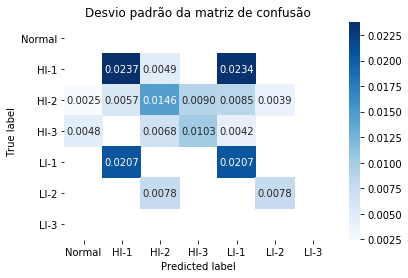

In [4]:
confusion_matrix_mean = np.mean(confu_matrices, axis=0)
confusion_matrix_std = np.std(confu_matrices, axis=0)

print(confusion_matrix_mean)
sns.heatmap(
    data=confusion_matrix_mean,
    cmap='Blues',
    vmin=0,
    vmax=1,
    annot=True,
    fmt='.4f',
    mask=confusion_matrix_mean == 0,
    xticklabels=TARGET_LABELS,
    yticklabels=TARGET_LABELS
    ).set(
        title='Matriz de confusão média',
        xlabel='Predicted label',
        ylabel='True label')

plt.show()

print(confusion_matrix_std)
sns.heatmap(
    data=confusion_matrix_std,
    cmap='Blues',
    annot=True,
    fmt='.4f',
    mask=confusion_matrix_std == 0,
    xticklabels=TARGET_LABELS,
    yticklabels=TARGET_LABELS
    ).set(
        title='Desvio padrão da matriz de confusão',
        xlabel='Predicted label',
        ylabel='True label')

## Resultados gerais

count    30.000000
mean      0.985678
std       0.004792
min       0.976879
25%       0.982659
50%       0.985549
75%       0.988439
max       0.994220
Name: Acurácia, dtype: float64


Acurácia
0.986513
0.980732
0.986513
0.984586
0.990366
0.984586
0.986513
0.978805
0.990366
0.986513


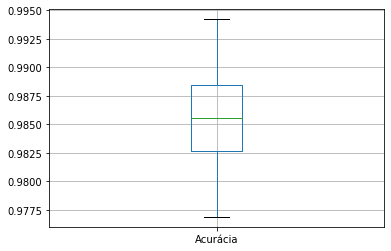

In [5]:
acc_s = pd.Series(data=acc_por_rodada, name='Acurácia')

print(acc_s.describe())

acc_s.to_frame().boxplot()

acc_s.to_frame().style.hide_index().background_gradient(cmap='Blues')

## Resultados por frequência

In [6]:
freq_df = pd.concat(freq_scores_df, ignore_index=True)

acc_columns = [col for col in freq_df.columns if 'acc' in col]
sup_columns = [col for col in freq_df.columns if 'support' in col]

freq_accs = freq_df[acc_columns]
freq_sups = freq_df[sup_columns]

### Acurácias por frequências

In [7]:
freq_accs.style.hide_index()

freq_30.0_acc,freq_35.0_acc,freq_40.0_acc,freq_45.0_acc,freq_50.0_acc,freq_55.0_acc,freq_60.0_acc
1.000000,0.975309,0.986667,0.987500,0.985915,1.000000,0.972603
0.969231,1.000000,0.972973,0.988235,0.986111,0.988764,0.949153
0.986842,0.987342,0.975309,1.000000,1.000000,1.000000,0.961039
1.000000,1.000000,0.960526,1.000000,0.987179,0.975309,0.970149
0.985075,1.000000,0.988095,1.000000,0.986842,0.987500,0.986667
0.984848,1.000000,0.932432,1.000000,0.969697,1.000000,1.000000
1.000000,1.000000,0.950617,1.000000,0.985075,1.000000,0.975309
1.000000,0.970149,0.941860,1.000000,1.000000,1.000000,0.956044
0.985294,1.000000,0.973684,1.000000,1.000000,1.000000,0.971014
1.000000,1.000000,0.987805,0.986842,0.987500,0.985075,0.961039


,freq_30.0_acc,freq_35.0_acc,freq_40.0_acc,freq_45.0_acc,freq_50.0_acc,freq_55.0_acc,freq_60.0_acc
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.989872,0.990311,0.972787,0.996127,0.990900,0.990435,0.970989
std,0.011650,0.013924,0.018821,0.006869,0.012463,0.010643,0.013935
min,0.954023,0.953846,0.932432,0.975309,0.948052,0.963415,0.943662
25%,0.985075,0.984574,0.968518,0.991279,0.986205,0.985609,0.960654
50%,0.986754,1.000000,0.975154,1.000000,1.000000,0.988888,0.971809
75%,1.000000,1.000000,0.986667,1.000000,1.000000,1.000000,0.982289
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


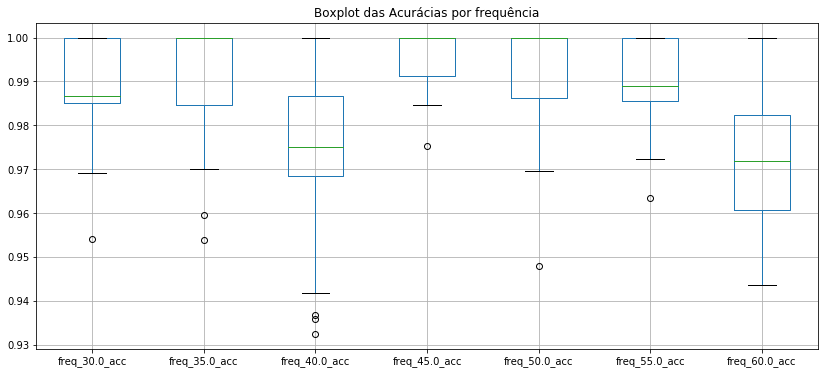

In [8]:
freq_accs.boxplot(figsize=(14, 6)).set(title='Boxplot das Acurácias por frequência')
freq_accs.describe()

### Distribuições de frequências por amostra

In [9]:
freq_sups.style.hide_index()

freq_30.0_support,freq_35.0_support,freq_40.0_support,freq_45.0_support,freq_50.0_support,freq_55.0_support,freq_60.0_support
56,81,75,80,71,83,73
65,75,74,85,72,89,59
76,79,81,61,71,74,77
79,70,76,68,78,81,67
67,69,84,68,76,80,75
66,76,74,77,66,80,80
66,74,81,80,67,70,81
70,67,86,62,57,86,91
68,76,76,68,71,91,69
60,77,82,76,80,67,77


,freq_30.0_support,freq_35.0_support,freq_40.0_support,freq_45.0_support,freq_50.0_support,freq_55.0_support,freq_60.0_support
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,69.366667,73.366667,78.333333,72.233333,71.000000,81.200000,73.500000
std,7.513130,5.875040,6.326372,7.127815,6.700489,7.805392,6.213167
min,56.000000,62.000000,62.000000,61.000000,57.000000,65.000000,59.000000
25%,64.250000,69.000000,75.250000,67.250000,66.250000,78.000000,70.000000
50%,68.000000,74.000000,78.000000,70.000000,71.000000,81.500000,73.000000
75%,74.500000,77.750000,81.750000,78.500000,75.500000,88.250000,76.750000
max,87.000000,83.000000,91.000000,86.000000,85.000000,94.000000,91.000000


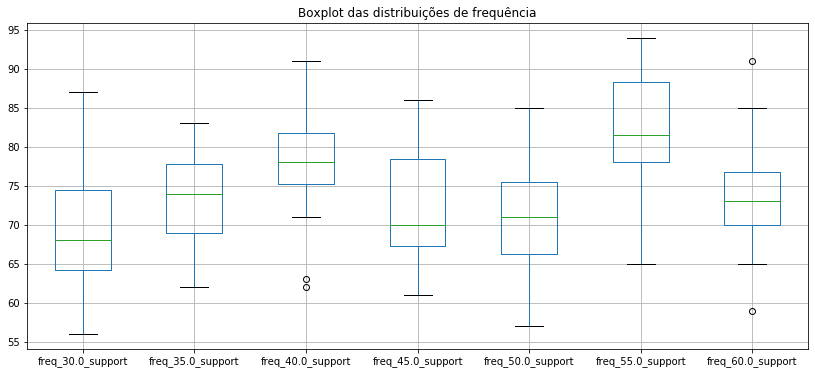

In [10]:
freq_sups.boxplot(figsize=(14, 6)).set(title='Boxplot das distribuições de frequência')
freq_sups.describe()